In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [4]:
data = pd.read_csv('Main_Data.csv')
data.head()

,Age,Sex,Resting_BP,Cholestrol_mg/dl,Fasting_sugar,Max_HR_achieved,Exercise_induced_angina,ST_depression,Chest_pain_type_1,Chest_pain_type_2,Chest_pain_type_3,Chest_pain_type_4,Resting_ECG_0,Resting_ECG_1,Resting_ECG_2,Diagnosis
0,63,1,145,233,1,150,0,2.3,1,0,0,0,0,0,1,0
1,67,1,160,286,0,108,1,1.5,0,0,0,1,0,0,1,1
2,67,1,120,229,0,129,1,2.6,0,0,0,1,0,0,1,1
3,37,1,130,250,0,187,0,3.5,0,0,1,0,1,0,0,0
4,41,0,130,204,0,172,0,1.4,0,1,0,0,0,0,1,0


In [5]:
data["Diagnosis"].value_counts()/(327+237)

0    0.579787
1    0.420213
Name: Diagnosis, dtype: float64

In [6]:
from sklearn.utils import shuffle
data = shuffle(data)

In [7]:
data.isnull().sum()

Age                        0
Sex                        0
Resting_BP                 0
Cholestrol_mg/dl           0
Fasting_sugar              0
Max_HR_achieved            0
Exercise_induced_angina    0
ST_depression              0
Chest_pain_type_1          0
Chest_pain_type_2          0
Chest_pain_type_3          0
Chest_pain_type_4          0
Resting_ECG_0              0
Resting_ECG_1              0
Resting_ECG_2              0
Diagnosis                  0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = data.iloc[:, 0:15].values
y = data.iloc[:,15].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train_t, X_val, y_train_t, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state=0)
sc = StandardScaler()
sc.fit(X_train_t)
X_train_t_std = sc.transform(X_train_t)
X_val_std = sc.transform(X_val)
X_test_std = sc.transform(X_test)

In [9]:
param_grid = [
  {'C': np.array([0.001,0.003,0.01,0.03,0.1,0.3,1,3]), 'kernel': ['linear','rbf','sigmoid'],
  'gamma': np.array([0.001,0.003,0.01,0.03,0.1,0.3,1,3])}
 ]
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
svm_clf = SVC()
grid = GridSearchCV(svm_clf, param_grid, cv=10, scoring='accuracy')

/home/rohan/anaconda2/envs/innovacer/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/rohan/anaconda2/envs/innovacer/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [10]:
grid.fit(X_train_t_std, y_train_t)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': array([  1.00000e-03,   3.00000e-03,   1.00000e-02,   3.00000e-02,
         1.00000e-01,   3.00000e-01,   1.00000e+00,   3.00000e+00]), 'kernel': ['linear', 'rbf', 'sigmoid'], 'gamma': array([  1.00000e-03,   3.00000e-03,   1.00000e-02,   3.00000e-02,
         1.00000e-01,   3.00000e-01,   1.00000e+00,   3.00000e+00])}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [11]:
grid.grid_scores_

[mean: 0.61243, std: 0.01324, params: {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'},
 mean: 0.60947, std: 0.00702, params: {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.60947, std: 0.00702, params: {'C': 0.001, 'gamma': 0.001, 'kernel': 'sigmoid'},
 mean: 0.61243, std: 0.01324, params: {'C': 0.001, 'gamma': 0.0030000000000000001, 'kernel': 'linear'},
 mean: 0.60947, std: 0.00702, params: {'C': 0.001, 'gamma': 0.0030000000000000001, 'kernel': 'rbf'},
 mean: 0.60947, std: 0.00702, params: {'C': 0.001, 'gamma': 0.0030000000000000001, 'kernel': 'sigmoid'},
 mean: 0.61243, std: 0.01324, params: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'},
 mean: 0.60947, std: 0.00702, params: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'},
 mean: 0.60947, std: 0.00702, params: {'C': 0.001, 'gamma': 0.01, 'kernel': 'sigmoid'},
 mean: 0.61243, std: 0.01324, params: {'C': 0.001, 'gamma': 0.029999999999999999, 'kernel': 'linear'},
 mean: 0.60947, std: 0.00702, params: {'C': 0.001, 'gamma': 0.0299

In [12]:
grid.best_params_

{'C': 0.029999999999999999, 'gamma': 0.001, 'kernel': 'linear'}

In [13]:
from sklearn.metrics import accuracy_score
svm_clf = SVC(C=3, kernel ='rbf', gamma = 0.003, probability=True)
svm_clf.fit(X_train_t_std, y_train_t)
y_pred_val = svm_clf.predict(X_val_std)
accuracy_score(y_pred_val, y_val)

0.79646017699115046

In [14]:
y_pred_test = svm_clf.predict(X_test_std)
y_test_prob = np.array(svm_clf.predict_proba(X_test_std)[:,1])
accuracy_score(y_pred_test, y_test)

0.84070796460176989

In [15]:
y_pred = np.array(y_test_prob>0.4,dtype=np.int)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [16]:
accuracy_score(y_pred, y_test)

0.83185840707964598

In [17]:
np.sum(y_test)/len(y_test)

0.41592920353982299

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
tpr, fpr, thresholds = roc_curve(y_test, y_test_prob)
plt.plot(tpr,fpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

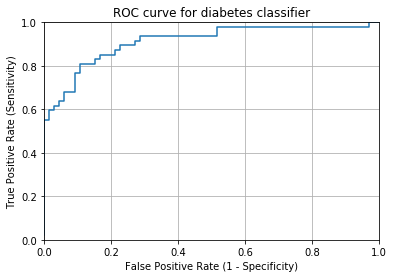

In [19]:
plt.show()

In [20]:
roc_auc_score(y_test,y_test_prob)

0.91231463571889104

In [21]:
from sklearn.preprocessing import binarize
from sklearn.metrics import confusion_matrix, recall_score
def evaluate_score(threshold):
    ypred_class = binarize([y_test_prob],threshold)
    ypred_class = ypred_class[0]
    confusion = confusion_matrix(y_test,ypred_class)
    tpr = recall_score(y_test,ypred_class)
    fpr = confusion[0,1]/float(confusion[0,1] + confusion[0,0])
    print("Senstivty:", tpr)
    print("Specificity :", 1-fpr)

In [22]:
evaluate_score(0.55)

Senstivty: 0.744680851064
Specificity : 0.909090909091


In [57]:
age=input("Age: ")
sex=input("Sex:")
cpt=input("Chest_pain type: ")
rest_bp=input("Resting BP: ")
chol=input("Cholestrol: ")
fast_sugar=input("Fasting Sugar: ")
rest_ecg=input("Resting ECG: ")
max_hr=input("Max_hr: ")
ex_in=input("Excercise induced angina: ")
stdep=input("ST_depression: ")

Age: 45
Sex:1
Chest_pain type: 2
Resting BP: 130
Cholestrol: 250
Fasting Sugar: 0
Resting ECG: 2
Max_hr: 160
Excercise induced angina: 0
ST_depression: 2.2


In [102]:
test1=[]
test = np.zeros((1, 15))

In [107]:
test[0,0]=age
test[0,1]=sex
test[0,2]=rest_bp
test[0,3]=chol
test[0,4]=fast_sugar
test[0,5]=max_hr
test[0,6]=ex_in
test[0,7]=stdep
test[0,7 + int(cpt)]=1
test[0,12 + int(rest_ecg)]=1
test

array([[  45. ,    1. ,  130. ,  250. ,    0. ,  160. ,    0. ,    2.2,
           0. ,    1. ,    0. ,    0. ,    0. ,    0. ,    1. ]])

In [86]:
test1.append(age)
test1.append(sex)
test1.append(cpt)
test1.append(rest_bp)
test1.append(chol)
test1.append(fast_sugar)
test1.append(rest_ecg)
test1.append(max_hr)
test1.append(ex_in)
test1.append(stdep)

In [109]:
test

array([[  45. ,    1. ,  130. ,  250. ,    0. ,  160. ,    0. ,    2.2,
           0. ,    1. ,    0. ,    0. ,    0. ,    0. ,    1. ]])

In [118]:
from sklearn.preprocessing import Normalizer

In [119]:
test_std = Normalizer().fit_transform(test)
test_std

array([[ 0.13754791,  0.00305662,  0.39736062,  0.76415504,  0.        ,
         0.48905923,  0.        ,  0.00672456,  0.        ,  0.00305662,
         0.        ,  0.        ,  0.        ,  0.        ,  0.00305662]])

In [121]:
pred = svm_clf.predict(test_std)
pred[0]

0